# Class Number
This file is just some nicely arranged data and images from the data in trace_only_converted.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import groupby

In [2]:
df=pd.read_csv("../CSV/trace_only_converted.csv")
df.head()

,trace,admissible,L_class_number,commutator_class_number,walks
0,18,True,1,1,4.0
1,46,False,2,0,6.0
2,62,False,4,0,8.0
3,66,True,2,1,7.0
4,82,False,4,0,8.0


One can check which admissible values are not traces of the commutator subgroup for example

In [3]:
admissibles=df.loc[(df.admissible==True)]
admissibles.loc[admissibles.commutator_class_number==0]

,trace,admissible,L_class_number,commutator_class_number,walks
61,1006,True,10,0,27.600000
106,1726,True,32,0,29.500000
158,2558,True,60,0,32.066667
293,4718,True,40,0,45.000000


## Plotting h(t)

In [4]:
#This is just to help draw an occasional lower bound in the graphs
xmin=df.trace.min()
xmax=df.trace.max()
x=np.linspace(xmin, xmax, 400)

#helpful when dividing by class numbers
admissibles2=admissibles.loc[admissibles.commutator_class_number!=0]

# A list of some interesting modulo conditions for traces
special_traces=admissibles.loc[admissibles.trace % 3 ==0].loc[(admissibles.trace % 256 ==18) | (admissibles.trace % 256 ==146) | (admissibles.trace % 256 ==238) | (admissibles.trace % 256 ==110)]

othertraces=[]
for t in admissibles.trace.values:
    if t not in special_traces.trace.values:
        othertraces.append(t)
non_special_traces=admissibles.loc[admissibles.trace.isin(othertraces)]

We can plot $(|t|, h(t))$ where h(t) is the L_class_number

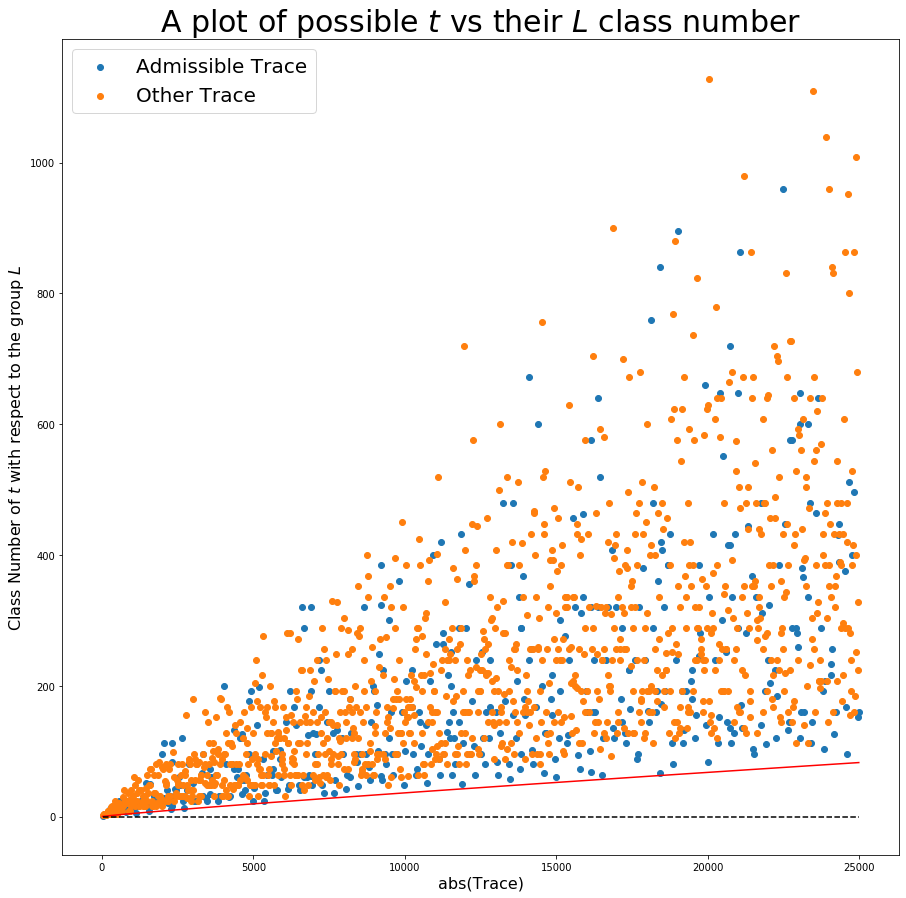

In [5]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles.trace.values, admissibles.L_class_number.values,label='Admissible Trace')
plt.scatter(df.loc[(df.admissible==False)].trace.values, df.loc[(df.admissible==False)].L_class_number.values,label='Other Trace')
plt.plot(x, np.power(x, 9/10)/110, 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Class Number of $t$ with respect to the group $L$", fontsize = 16)
# Also a title
plt.title("A plot of possible $t$ vs their $L$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

We can plot $(|t|, h(t))$ where h(t) is the L_class_number for just the admissible traces

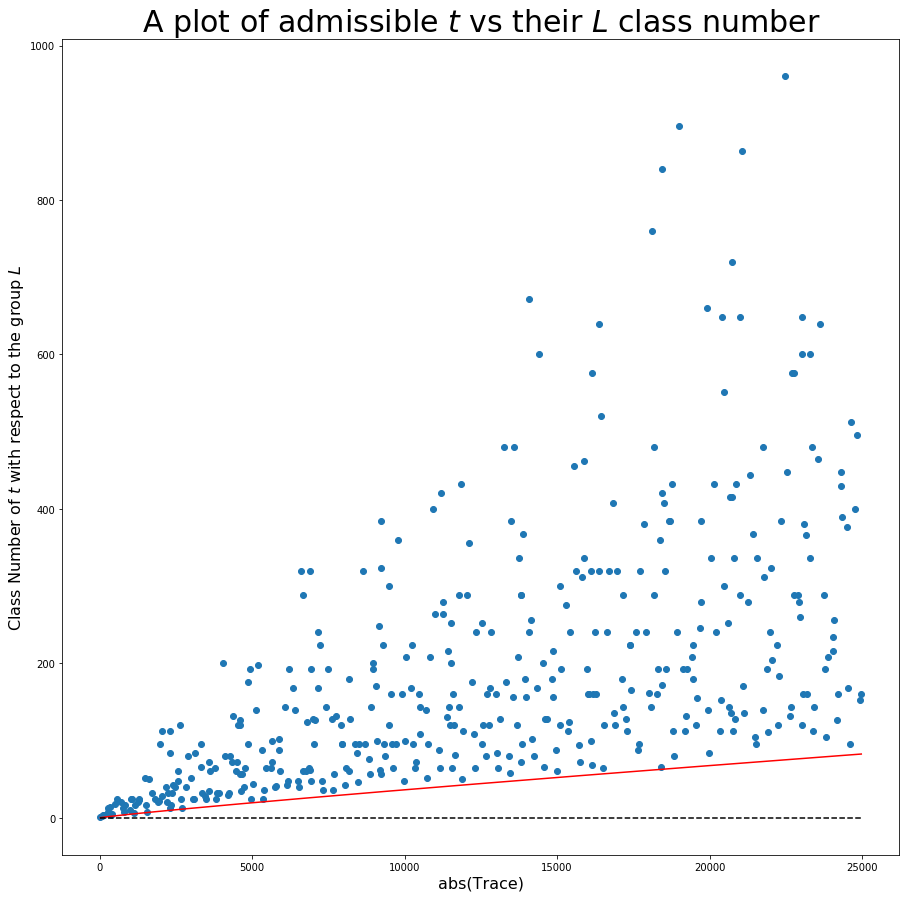

In [6]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles.trace.values, admissibles.L_class_number.values)
plt.plot(x, np.power(x, 9/10)/110, 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Class Number of $t$ with respect to the group $L$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their $L$ class number", fontsize = 30)

plt.show()

We can plot $(|t|, 1/h(t))$ where h(t) is the L_class_number for just the admissible traces

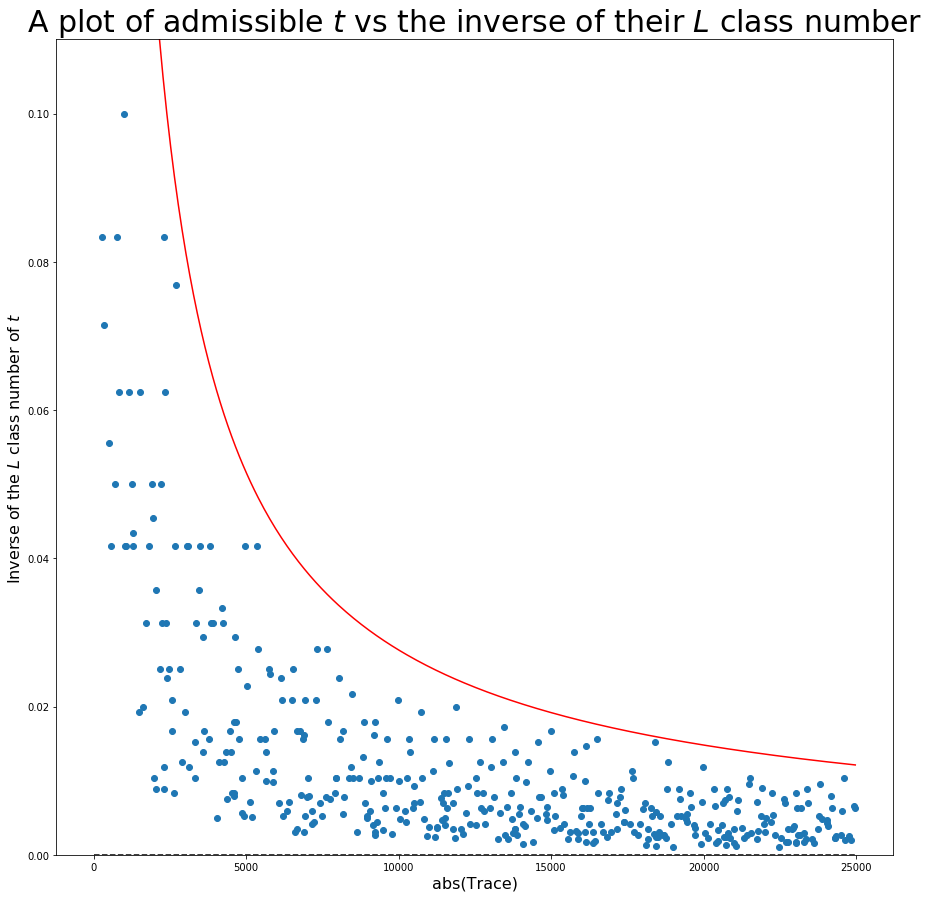

In [7]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles.trace.values, 1/admissibles.L_class_number.values)
plt.plot(x, 110/np.power(x, 9/10), 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.ylim(0, .11)
plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Inverse of the $L$ class number of $t$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs the inverse of their $L$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.show()

We can plot $(|t|, h(t))$ where h(t) is the L_class_number for just the admissible traces and label the points based on what $t$ is congruent to modulo 768

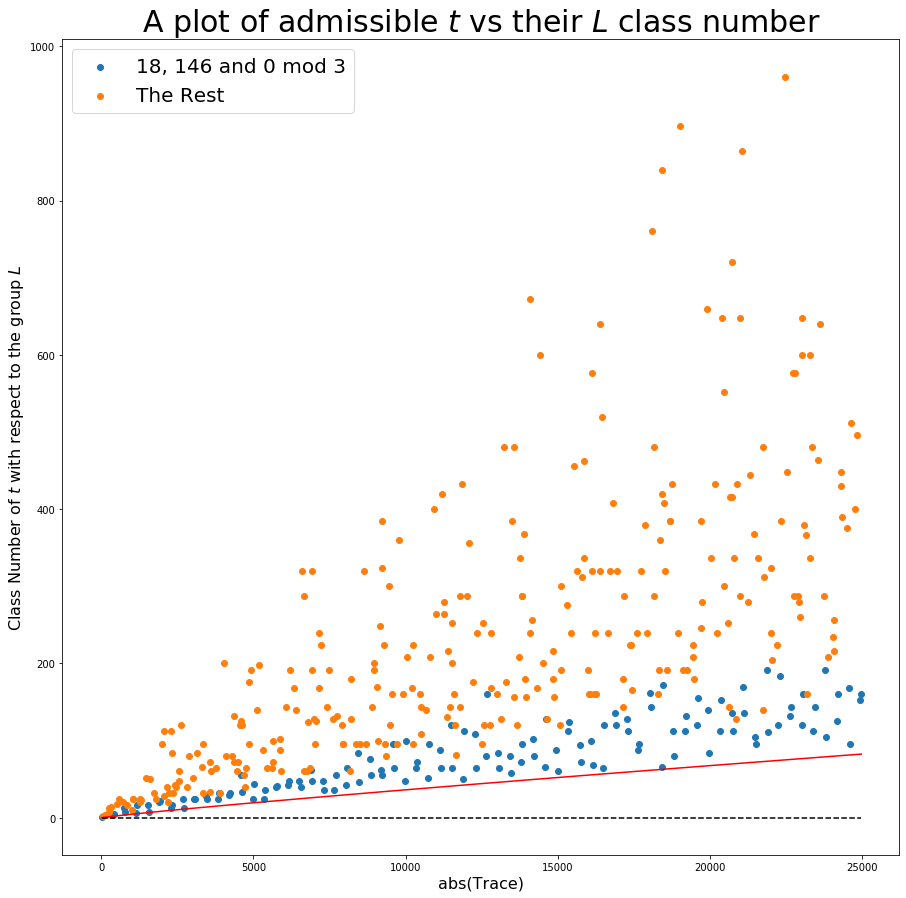

In [8]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.trace.values, special_traces.L_class_number.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.trace.values,non_special_traces.L_class_number.values,label='The Rest')
plt.plot(x, np.power(x, 9/10)/110, 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Class Number of $t$ with respect to the group $L$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their $L$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

We can plot $(|t|, 1/h(t))$ where h(t) is the L_class_number for just the admissible traces and label the points based on what $t$ is congruent to modulo 768

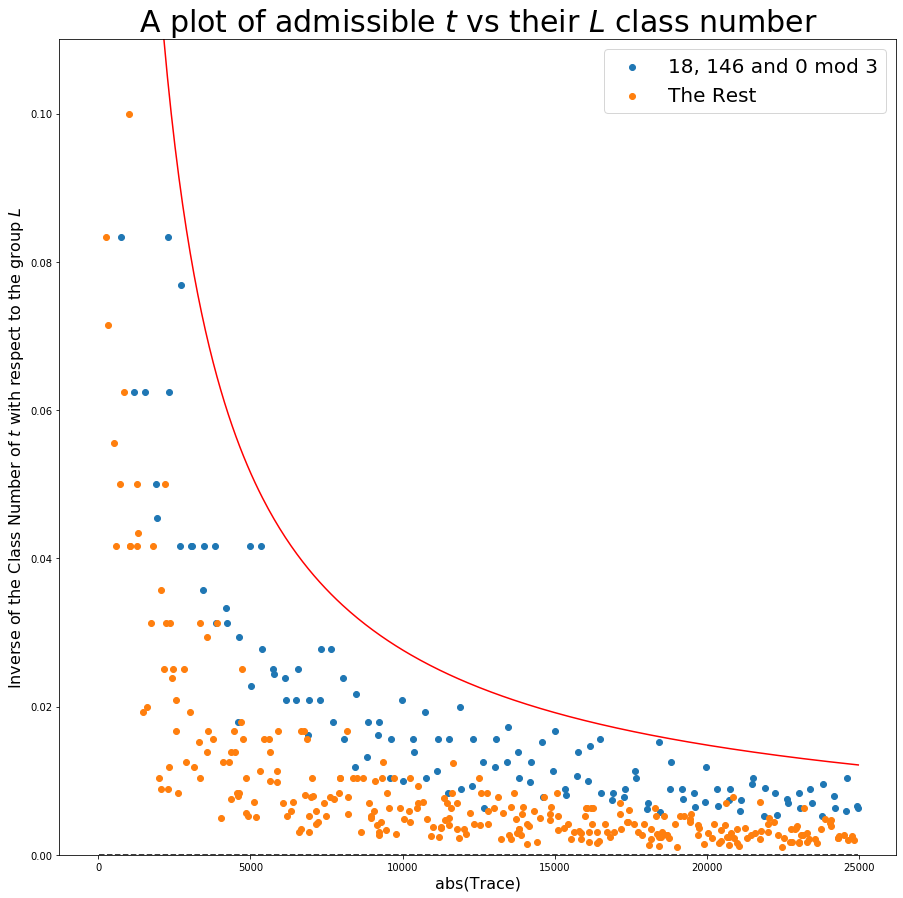

In [9]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.trace.values, 1/special_traces.L_class_number.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.trace.values, 1/non_special_traces.L_class_number.values,label='The Rest')
plt.plot(x, 110/np.power(x, 9/10), 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.ylim(0, .11)
plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Inverse of the Class Number of $t$ with respect to the group $L$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their $L$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

## Plotting h'(t)

We can plot $(|t|, h'(t))$ where h'(t) is the commutator_class_number and label based on if they are failures or not

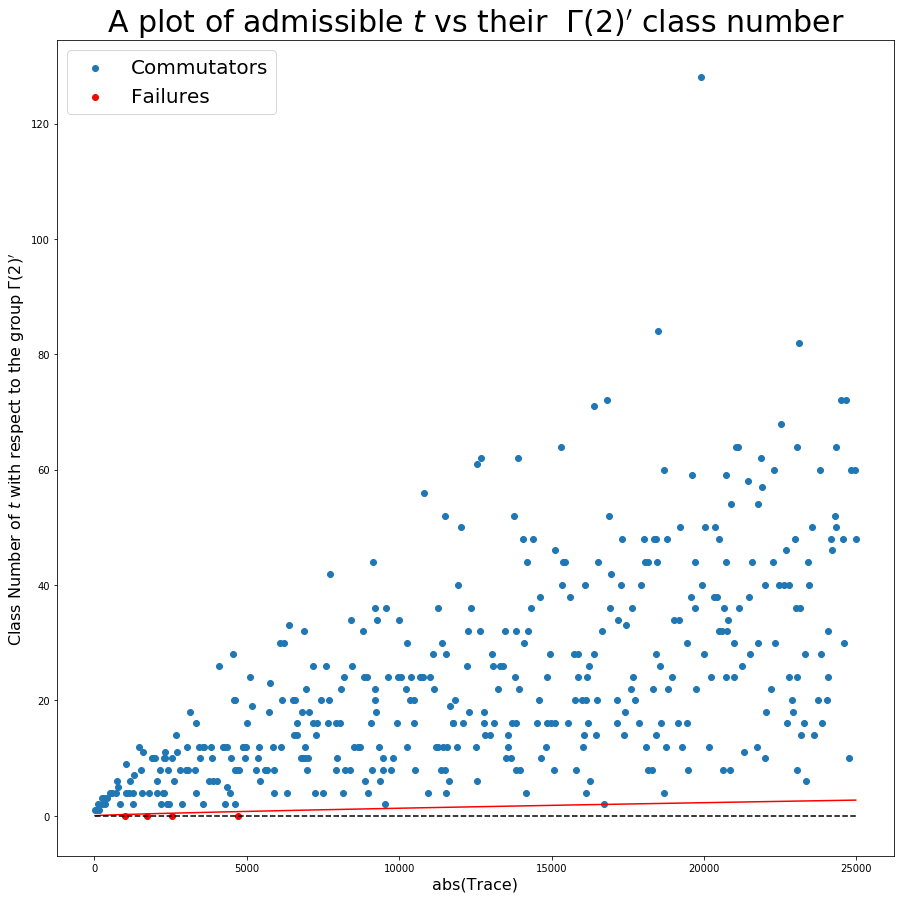

In [10]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles2.trace.values, admissibles2.commutator_class_number.values,label='Commutators')
plt.scatter(admissibles.loc[admissibles.commutator_class_number==0].trace.values, admissibles.loc[admissibles.commutator_class_number==0].commutator_class_number.values,color='red', label='Failures' )
plt.plot(x, np.power(x, 9/10)/330/np.log(x), 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Class Number of $t$ with respect to the group $\Gamma(2)'$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their  $\Gamma(2)'$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

We can plot $(|t|, 1/h'(t))$ where h'(t) is the commutator_class_number for the non-failures

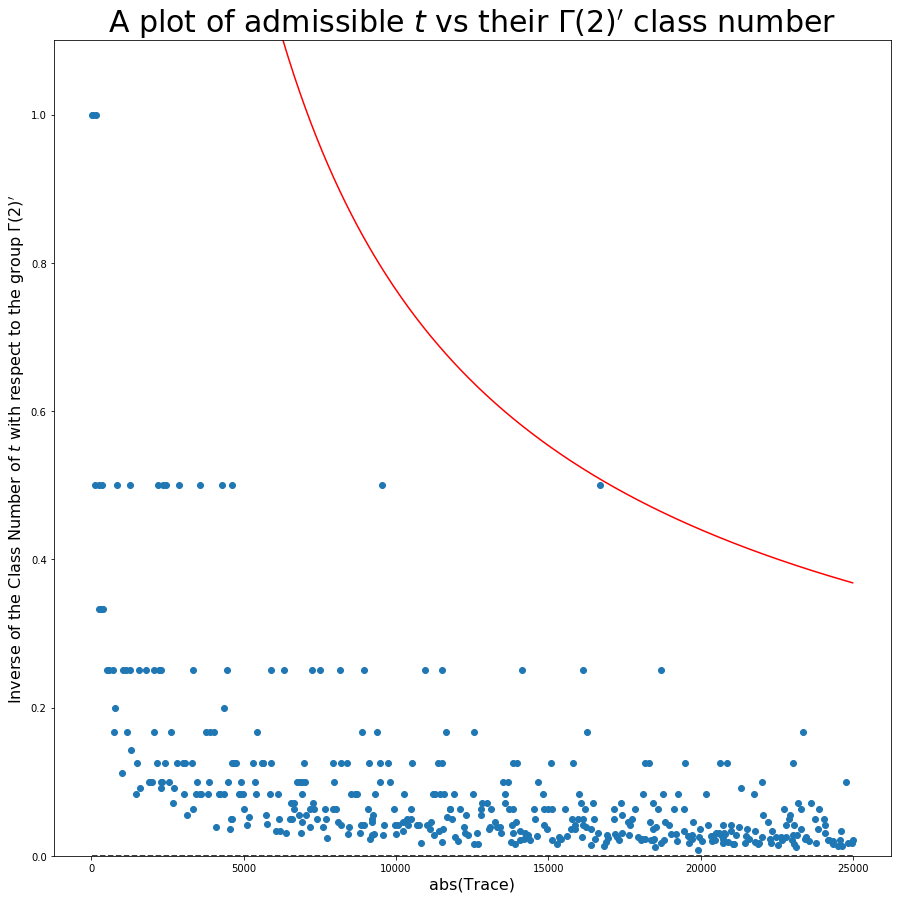

In [11]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles2.trace.values, 1/admissibles2.loc[admissibles2.commutator_class_number!=0].commutator_class_number.values)
plt.plot(x, 330*np.log(x)/np.power(x, 9/10), 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.ylim(0,1.1)
plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Inverse of the Class Number of $t$ with respect to the group $\Gamma(2)'$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their $\Gamma(2)'$ class number", fontsize = 30)


plt.show()

We can plot $(|t|, h'(t))$ where h'(t) is the commutator_class_number for just the admissible traces and label the points based on what $t$ is congruent to modulo 768

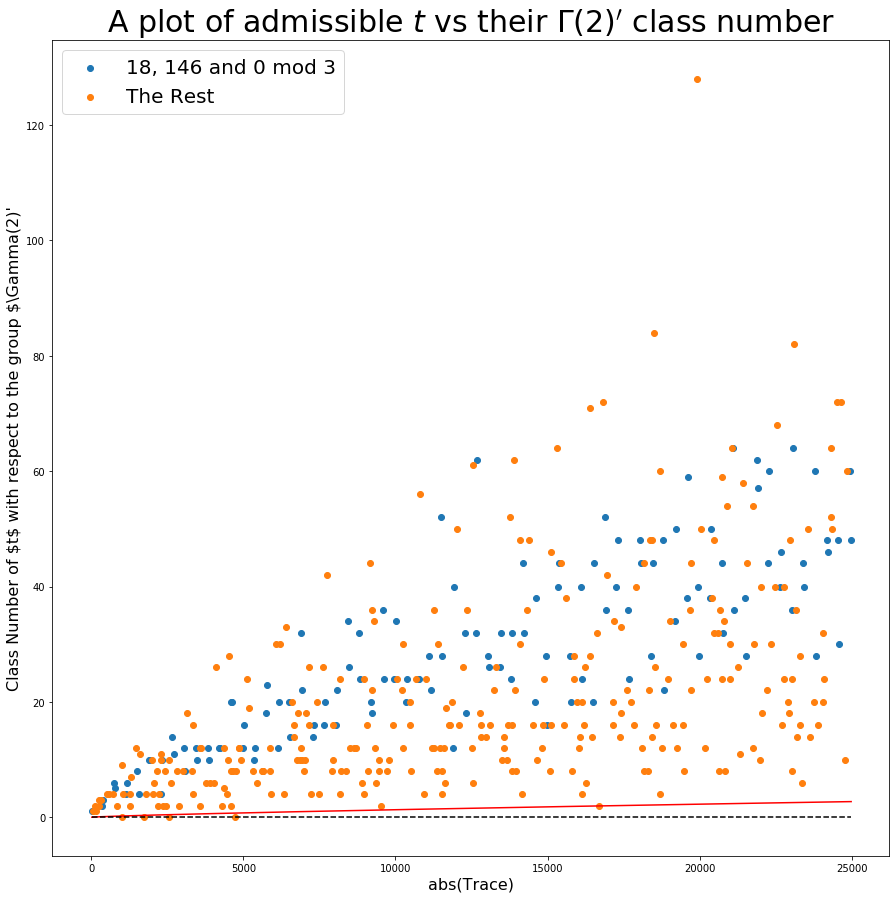

In [12]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.trace.values, special_traces.commutator_class_number.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.trace.values,non_special_traces.commutator_class_number.values,label='The Rest')
plt.plot(x, np.power(x, 9/10)/330/np.log(x), 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Class Number of $t$ with respect to the group $\Gamma(2)'", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their $\Gamma(2)'$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

We can plot $(|t|, 1/h'(t))$ where h'(t) is the commutator_class_number for just the admissible traces and label the points based on what $t$ is congruent to modulo 768

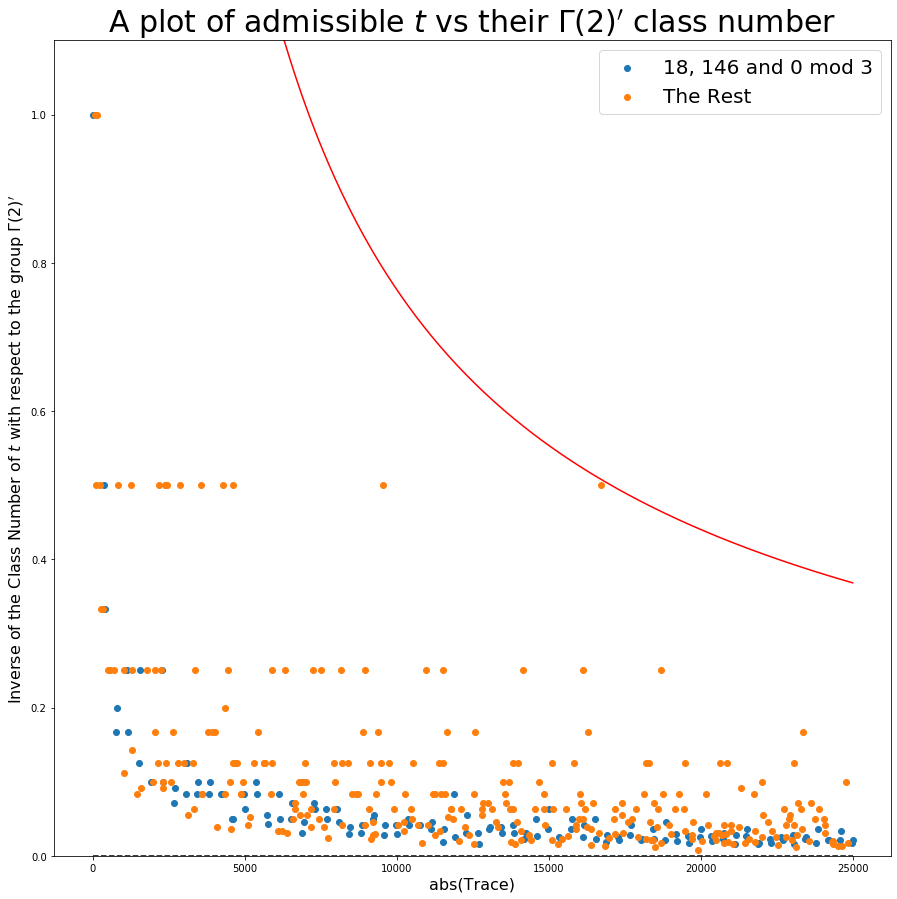

In [13]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.loc[special_traces.commutator_class_number!=0].trace.values, 1/special_traces.loc[special_traces.commutator_class_number!=0].commutator_class_number.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.loc[non_special_traces.commutator_class_number!=0].trace.values, 1/non_special_traces.loc[non_special_traces.commutator_class_number!=0].commutator_class_number.values,label='The Rest')
plt.plot(x, 330*np.log(x)/np.power(x, 9/10), 'r')
plt.plot(x, [0]*len(x), 'k--')

plt.ylim(0,1.1)
plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Inverse of the Class Number of $t$ with respect to the group $\Gamma(2)'$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs their $\Gamma(2)'$ class number", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

## Plotting the relationship between h(t) and h'(t)

We can plot $(|t|, h'(t)/h(t))$ 

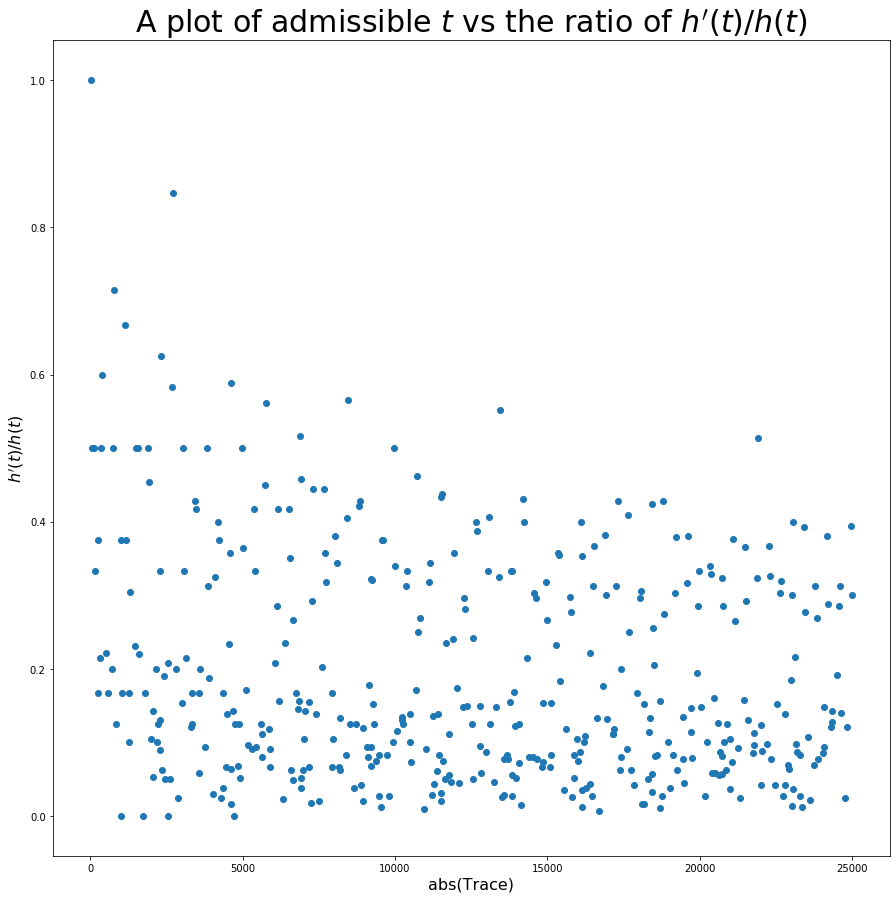

In [14]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles.trace.values, admissibles.commutator_class_number.values/admissibles.L_class_number.values)
#plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("$h'(t)/h(t)$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs the ratio of $h'(t)/h(t)$", fontsize = 30)


plt.show()

We can plot $(|t|, h(t)/h'(t))$ for the non-failures

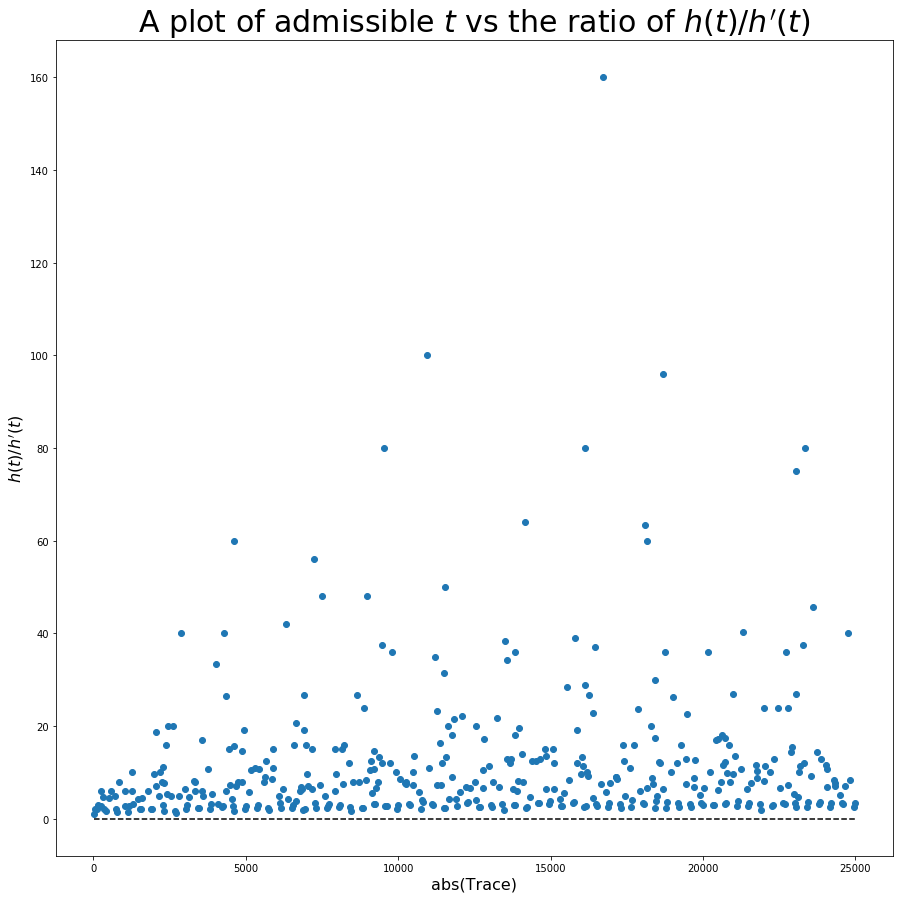

In [15]:
plt.figure(figsize=(15,15))
plt.scatter(admissibles2.trace.values, admissibles2.L_class_number.values/admissibles2.commutator_class_number.values)
plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("$h(t)/h'(t)$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs the ratio of $h(t)/h'(t)$", fontsize = 30)


plt.show()

Finally, we can do both pictures again, this time labeling if they are a special trace or not

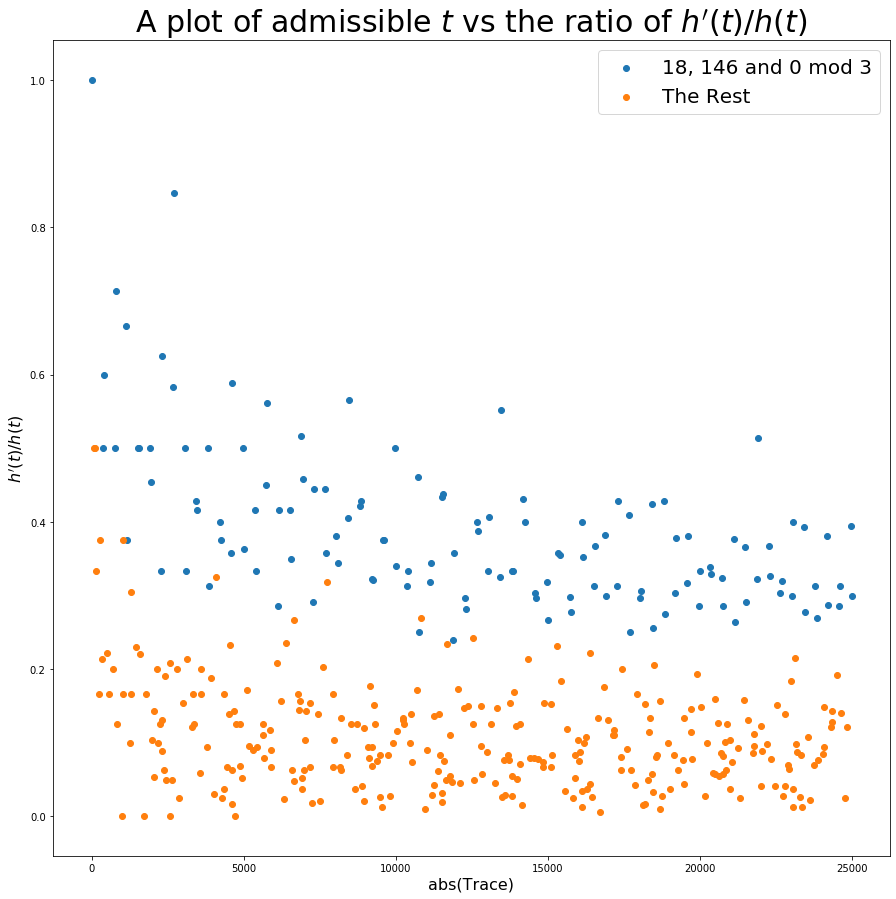

In [16]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.trace.values, special_traces.commutator_class_number.values/special_traces.L_class_number.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.trace.values,non_special_traces.commutator_class_number.values/non_special_traces.L_class_number.values,label='The Rest')
#plt.plot(x, [0]*len(x), 'k--')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("$h'(t)/h(t)$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs the ratio of $h'(t)/h(t)$", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

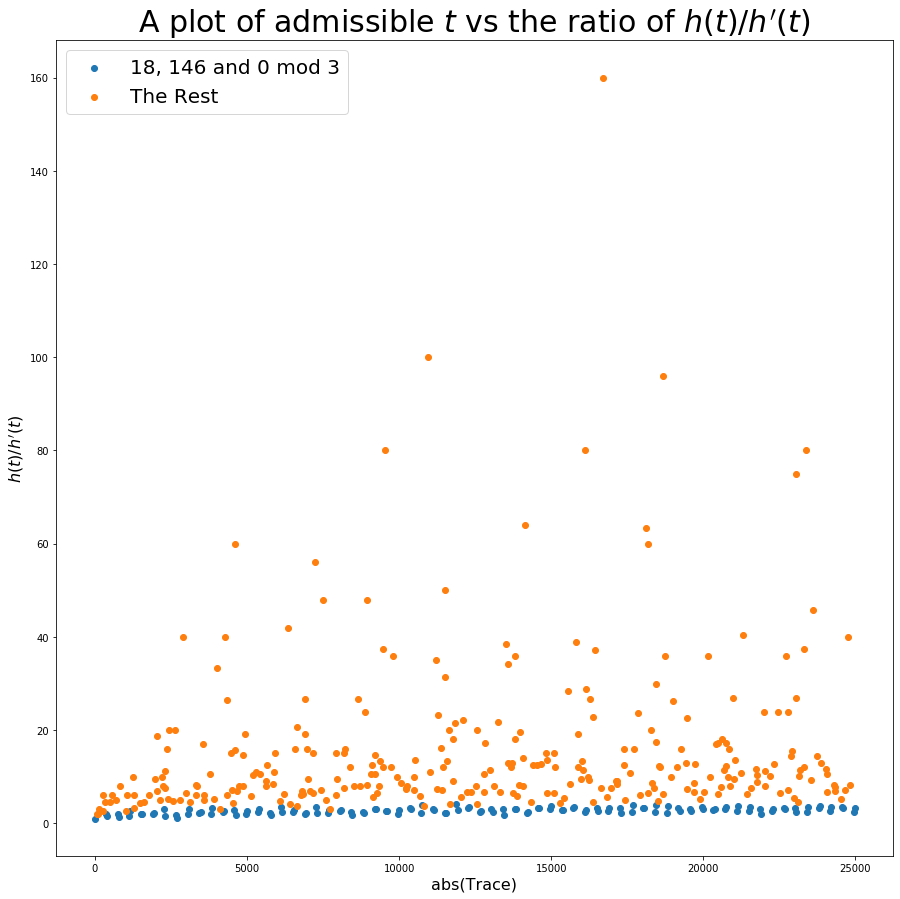

In [17]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.loc[special_traces.commutator_class_number!=0].trace.values, special_traces.loc[special_traces.commutator_class_number!=0].L_class_number.values/special_traces.loc[special_traces.commutator_class_number!=0].commutator_class_number.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.loc[non_special_traces.commutator_class_number!=0].trace.values, non_special_traces.loc[non_special_traces.commutator_class_number!=0].L_class_number.values/non_special_traces.loc[non_special_traces.commutator_class_number!=0].commutator_class_number.values,label='The Rest')
#plt.plot(x, [0]*len(x), 'k--')


plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("$h(t)/h'(t)$", fontsize = 16)
# Also a title
plt.title("A plot of admissible $t$ vs the ratio of $h(t)/h'(t)$", fontsize = 30)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

## Plotting the average length of the walks

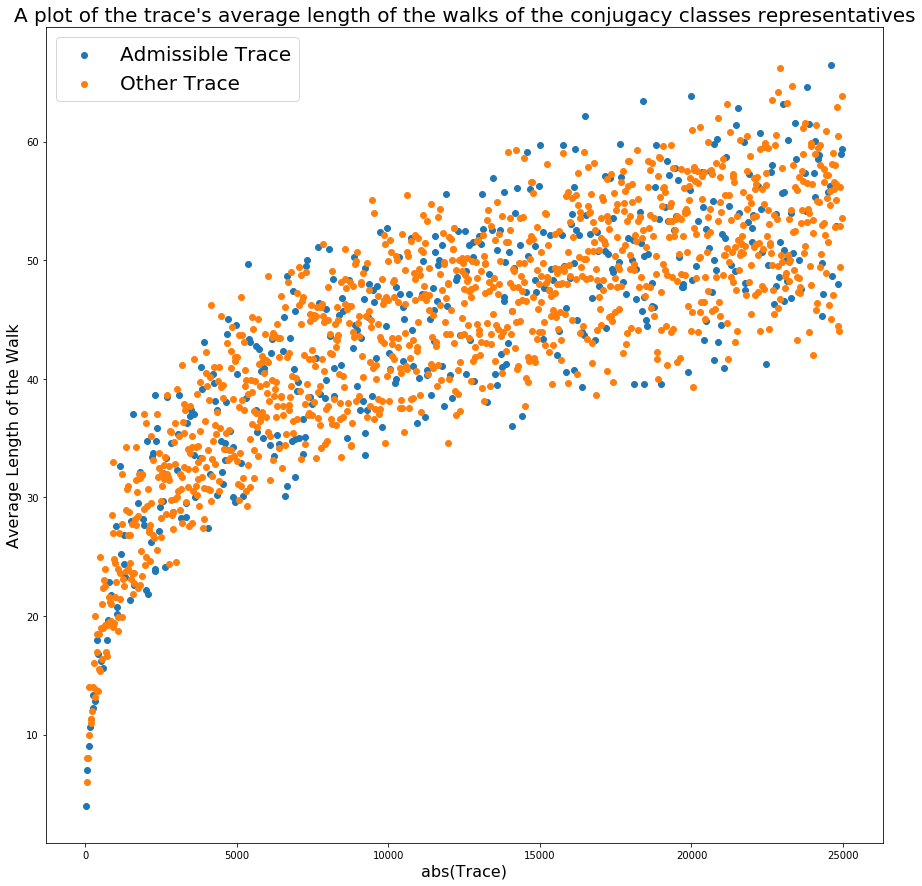

In [18]:
plt.figure(figsize=(15,15))
plt.scatter(df.loc[(df.admissible==True)].trace.values, df.loc[(df.admissible==True)].walks.values,label='Admissible Trace')
plt.scatter(df.loc[(df.admissible==False)].trace.values, df.loc[(df.admissible==False)].walks.values,label='Other Trace')


plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Average Length of the Walk", fontsize = 16)

# Also a title
plt.title("A plot of the trace's average length of the walks of the conjugacy classes representatives", fontsize = 20)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

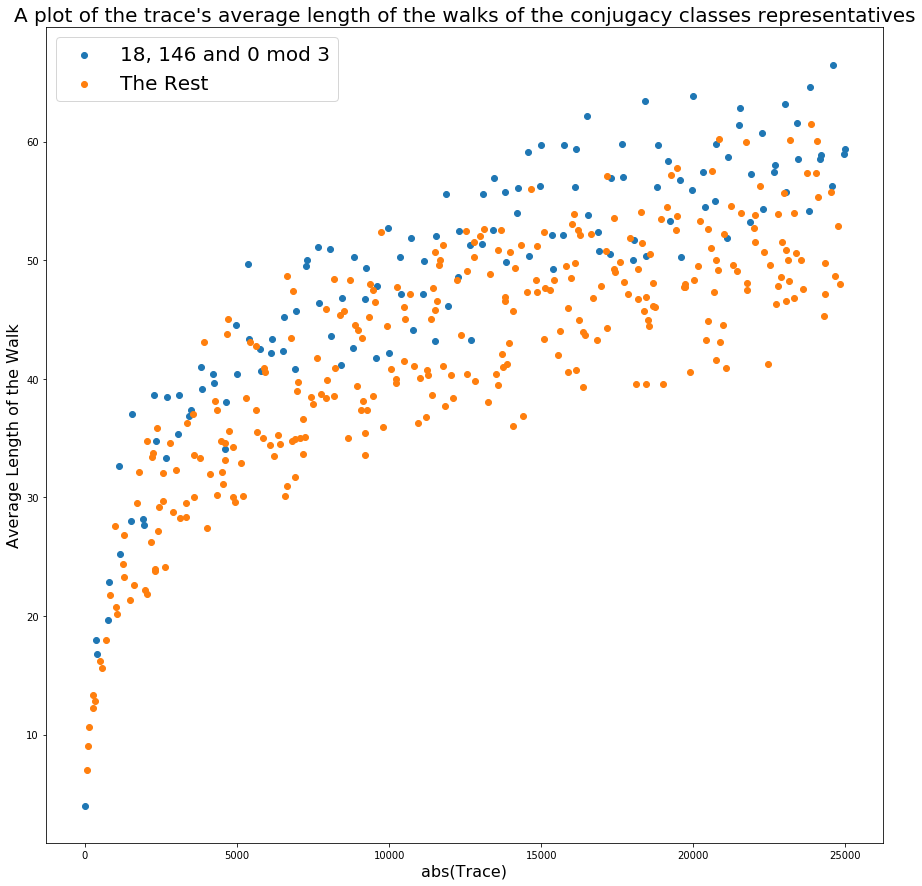

In [19]:
plt.figure(figsize=(15,15))
plt.scatter(special_traces.trace.values, special_traces.walks.values,label='18, 146 and 0 mod 3')
plt.scatter(non_special_traces.trace.values,non_special_traces.walks.values,label='The Rest')

plt.xlabel("abs(Trace)", fontsize = 16)
plt.ylabel("Average Length of the Walk", fontsize = 16)

# Also a title
plt.title("A plot of the trace's average length of the walks of the conjugacy classes representatives", fontsize = 20)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()

## Plotting the bound given by Epstein

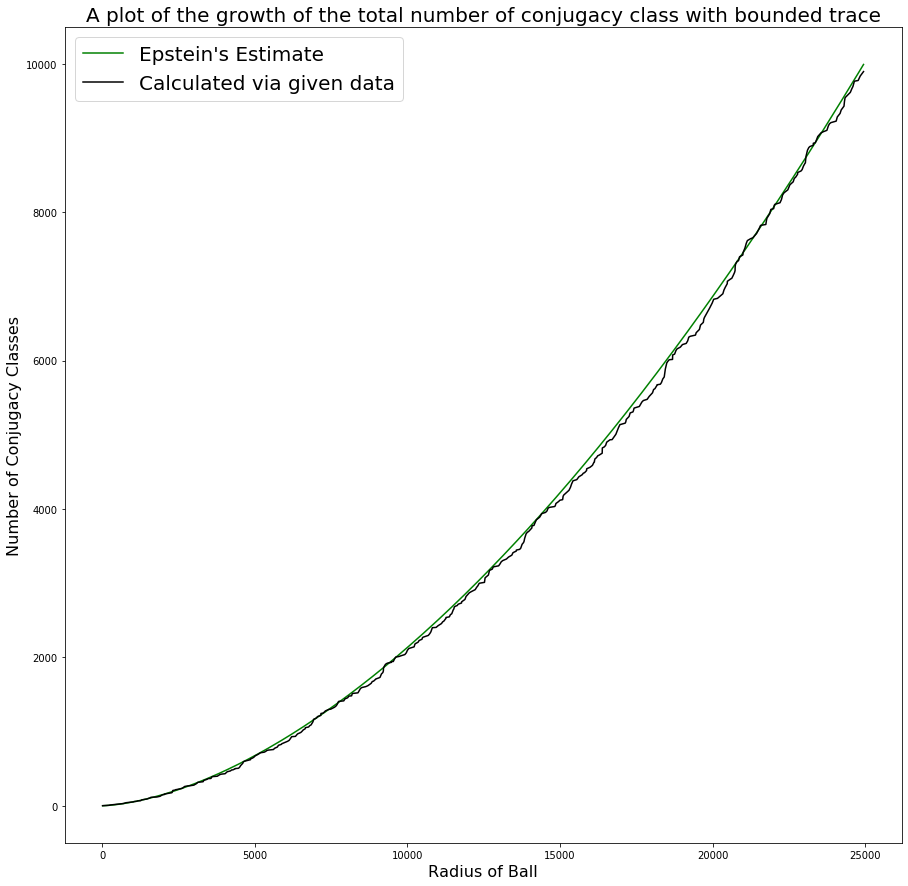

In [20]:
xvals=admissibles2.trace.values[0:len(admissibles2)-1]+1
hpt=admissibles2.commutator_class_number.values

yvals=(xvals**2/(np.log(xvals)**3)[0:len(admissibles2)-1])
y2valus=[sum(hpt[0:i]) for i in range(1, len(admissibles2))]


plt.figure(figsize=(15,15))
plt.plot(xvals,yvals/60, 'g',label="Epstein's Estimate")
plt.plot(xvals, y2valus, 'k',label="Calculated via given data")
plt.xlabel("Radius of Ball", fontsize = 16)
plt.ylabel("Number of Conjugacy Classes", fontsize = 16)
#plt.plot(x, [0]*len(x), 'k--')

# Also a title
plt.title("A plot of the growth of the total number of conjugacy class with bounded trace", fontsize = 20)

# plt.legend() adds the legend to the plot
plt.legend(fontsize=20)
plt.show()